In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kc1-csvsdmlp/kc1_csv.csv


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [4]:
data = pd.read_csv('../input/kc1-csvsdmlp/kc1_csv.csv')
df = pd.DataFrame(data)
data.head(6)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11.0,10.0,41.0,17.0,5.0,True
5,43.0,3.0,1.0,3.0,115.0,569.73,0.09,11.27,50.53,6423.73,...,35,2,4,0,11.0,20.0,74.0,41.0,5.0,True


In [5]:
df.shape

(2109, 22)

In [6]:
train,test = train_test_split(df, test_size=0.3, random_state=5)
print("Training Data :",train.shape)
print("Testing Data :",test.shape)

Training Data : (1476, 22)
Testing Data : (633, 22)


In [7]:
train_data = train.iloc[:,:]
test_data = test.iloc[:,:]

print("Training Data :",train_data.shape)
print("Testing Data :",test_data.shape)

Training Data : (1476, 22)
Testing Data : (633, 22)


In [8]:
# Training Data
train_x = train_data.iloc[:,:-1]
train_x = MinMaxScaler().fit_transform(train_x)
print("Training Data :", train_x.shape)

# Testing Data
test_x = test_data.iloc[:,:-1]
test_x = MinMaxScaler().fit_transform(test_x)
print("Testing Data :", test_x.shape)

Training Data : (1476, 21)
Testing Data : (633, 21)


In [9]:
# Training Data
train_y = train_data.iloc[:,-1:]
train_y[train_y==False] = 0
train_y[train_y==True] = 1
print("Training Data :", train_y.shape)

# Testing Data
test_y = test_data.iloc[:,-1:]
test_y[test_y==False] = 0
test_y[test_y==True] = 1
print("Testing Data :", test_y.shape)

Training Data : (1476, 1)
Testing Data : (633, 1)


In [10]:
# check the shape of X_train and X_test

train_x.shape, test_x.shape

((1476, 21), (633, 21))

In [11]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

train_x = scaler.fit_transform(train_x)

test_x = scaler.transform(test_x)

In [12]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(train_x, train_y)

GaussianNB()

In [13]:
y_pred = gnb.predict(test_x)

y_pred

array([1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0.

In [14]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(test_y, y_pred)))

Model accuracy score: 0.8215


In [15]:
y_pred_train = gnb.predict(train_x)

y_pred_train

array([0., 0., 0., ..., 0., 0., 0.])

In [16]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(train_y, y_pred_train)))

Training-set accuracy score: 0.8178


In [17]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(train_x, train_y)))

print('Test set score: {:.4f}'.format(gnb.score(test_x, test_y)))

Training set score: 0.8178
Test set score: 0.8215


In [18]:
# check class distribution in test set

test_y.value_counts()

defects
0.0        545
1.0         88
dtype: int64

In [19]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


In [20]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[486  59]
 [ 54  34]]

True Positives(TP) =  486

True Negatives(TN) =  34

False Positives(FP) =  59

False Negatives(FN) =  54


<AxesSubplot:>

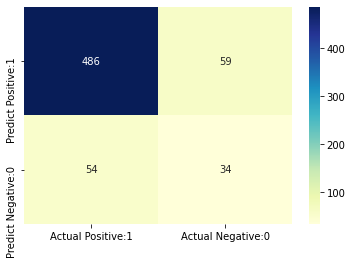

In [21]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [22]:
from sklearn.metrics import classification_report

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       545
         1.0       0.37      0.39      0.38        88

    accuracy                           0.82       633
   macro avg       0.63      0.64      0.64       633
weighted avg       0.83      0.82      0.82       633



In [23]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [24]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8215


In [25]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1785


In [26]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8917


In [27]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9000
